In [1]:
import moxing as mox
# mox.file.copy_parallel('s3://obs-aifood-bj4/aifood',
# 's3://obs-aifood-huqi88/aifood')
mox.file.copy_parallel('s3://obs-aifood-huqi88/aifood','./aifood/')
print('Copy procedure is completed !')


INFO:root:Using MoXing-v1.14.1-ddfd6c9a
INFO:root:Using OBS-Python-SDK-3.1.2
INFO:root:Listing OBS: 1000
INFO:root:Listing OBS: 2000
INFO:root:Listing OBS: 3000
INFO:root:Listing OBS: 4000
INFO:root:Listing OBS: 5000
INFO:root:pid: None.	1000/5001
INFO:root:pid: None.	2000/5001
INFO:root:pid: None.	3000/5001
INFO:root:pid: None.	4000/5001
INFO:root:pid: None.	5000/5001


Copy procedure is completed !


In [ ]:
import os
import subprocess
import time
from glob import glob
f=open("./aifood/meta/labels_10c.txt","r")
names = locals()
DATA_DIR = '/data-for-gen'
# 我们使用1/9的数据作为验证集：
val_split = 1/9
data_glob = glob('./aifood/images/*/*.jpg')
_index = int(len(data_glob)/10 * val_split)
print(_index)

if os.path.exists(DATA_DIR) == False:
    def gen_lnk_cmds(class_name, class_glob):
        cmds = ''
        print(range(len(class_glob)))
        for _i in range(len(class_glob)):
            time.sleep(1/20)
            filename = os.path.basename(class_glob[_i])

            src_path = os.path.realpath(class_glob[_i])
            sample_type = 'train' if _i > _index else 'val'
            lnk_path = os.path.realpath('./{}/{}/{}/{}'.format(DATA_DIR,sample_type, class_name, filename))
#             print(lnk_path)
            cmds = cmds + 'ln -s {} {}\n'.format(src_path, lnk_path)
#             print(cmds)

        return cmds
    for index,i in enumerate(f):
        print(i.strip())
        name=i.strip()
        path = '/train/'+name
        valpath = '/val/'+name
        print(path)
        print(DATA_DIR)
        print(path)
        # 打印文件目录
        print("当前项目路径：" + os.getcwd())

        # 获取到当前文件的目录，并检查是否有 directory_time 文件夹，如果不存在则自动新建 directory_time 文件
        try:
            File_Path =   os.getcwd() + DATA_DIR +  path 
            Val_Path =  os.getcwd() + DATA_DIR +  valpath 
            print(File_Path)
            # 判断是否已经存在该目录
            if not os.path.exists(File_Path):
                # 目录不存在，进行创建操作
                os.makedirs(File_Path) #使用os.makedirs()方法创建多层目录
                print("目录新建成功：" + File_Path)
            else:
                print("目录已存在！！！")
            if not os.path.exists(Val_Path):
                # 目录不存在，进行创建操作
                os.makedirs(Val_Path) #使用os.makedirs()方法创建多层目录
                print("目录新建成功：" + Val_Path)
            else:
                print("目录已存在！！！")
        except BaseException as msg:
            print("新建目录失败：" + msg)

        names['i' + str(i)+'_glob'] = glob('./aifood/images/'+name+'/*.jpg')
        print('i' + str(index) +'_glob') 
        
        print('prepare {} images for data augumentation'.format(name))
        with open('./tmp_gen_i{}.sh'.format(index), 'w') as f:
#             print(names.get('i' + str(i)+'_glob'))
            link_cmds = gen_lnk_cmds(name, names.get('i' + str(i)+'_glob'))
           
            f.write(link_cmds)
            time.sleep(1)
            subprocess.run(['sh', './tmp_gen_i{}.sh'.format(index)])
            time.sleep(1)
            subprocess.run(['rm', './tmp_gen_i{}.sh'.format(index)])
        



55
冰激凌
/train/冰激凌
/data-for-gen
/train/冰激凌
当前项目路径：/home/ma-user/work
/home/ma-user/work/data-for-gen/train/冰激凌
目录新建成功：/home/ma-user/work/data-for-gen/train/冰激凌
目录新建成功：/home/ma-user/work/data-for-gen/val/冰激凌
i0_glob
prepare 冰激凌 images for data augumentation
range(0, 500)
鸡蛋布丁
/train/鸡蛋布丁
/data-for-gen
/train/鸡蛋布丁
当前项目路径：/home/ma-user/work
/home/ma-user/work/data-for-gen/train/鸡蛋布丁
目录新建成功：/home/ma-user/work/data-for-gen/train/鸡蛋布丁
目录新建成功：/home/ma-user/work/data-for-gen/val/鸡蛋布丁
i1_glob
prepare 鸡蛋布丁 images for data augumentation
range(0, 500)


In [2]:
from PIL import Image
import os 
import glob 


def get_image_paths(folder): 
    return glob.glob(os.path.join(folder, '*/*.jpg')) 

def create_read_img(filename): 
    #读取图像
    im = Image.open(filename)
    im_resized = im.resize((128, 128))
    out_h = im.transpose(Image.FLIP_LEFT_RIGHT)
    out_w = im.transpose(Image.FLIP_TOP_BOTTOM)
    out_90 = im.transpose(Image.ROTATE_90)
    out_180 = im.transpose(Image.ROTATE_180)
    out_270 = im.transpose(Image.ROTATE_270)
    out_resize = im_resized
    
    out_h.save(filename[:-4]+'_h.jpg')
    out_w.save(filename[:-4]+'_w.jpg')
    out_90.save(filename[:-4]+'_90.jpg')
    out_180.save(filename[:-4]+'_180.jpg')
    out_270.save(filename[:-4]+'_270.jpg')
    out_resize.save(filename[:-4]+'_128.jpg')
    print(filename)
    
img_path = './data-for-gen/train/' 
imgs = get_image_paths(img_path) 

for i in imgs: 
    create_read_img(i)

./data-for-gen/train/三明治/44006.jpg
./data-for-gen/train/三明治/44095.jpg
./data-for-gen/train/三明治/43865.jpg
./data-for-gen/train/三明治/44035.jpg
./data-for-gen/train/三明治/44075.jpg
./data-for-gen/train/三明治/43706.jpg
./data-for-gen/train/三明治/44022.jpg
./data-for-gen/train/三明治/43723.jpg
./data-for-gen/train/三明治/44083.jpg
./data-for-gen/train/三明治/44091.jpg
./data-for-gen/train/三明治/43831.jpg
./data-for-gen/train/三明治/44025.jpg
./data-for-gen/train/三明治/43951.jpg
./data-for-gen/train/三明治/43713.jpg
./data-for-gen/train/三明治/43981.jpg
./data-for-gen/train/三明治/43708.jpg
./data-for-gen/train/三明治/43759.jpg
./data-for-gen/train/三明治/43700.jpg
./data-for-gen/train/三明治/43715.jpg
./data-for-gen/train/三明治/43995.jpg
./data-for-gen/train/三明治/43617.jpg
./data-for-gen/train/三明治/43733.jpg
./data-for-gen/train/三明治/43956.jpg
./data-for-gen/train/三明治/43938.jpg
./data-for-gen/train/三明治/43743.jpg
./data-for-gen/train/三明治/44041.jpg
./data-for-gen/train/三明治/43676.jpg
./data-for-gen/train/三明治/43615.jpg
./data-for-gen/train

In [3]:

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms
import time
import os


In [4]:
dataTrans = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])
 
    # image data path
# data_dir = './aifood/images'
# all_image_datasets = datasets.ImageFolder(data_dir, dataTrans)
# #print(all_image_datasets.class_to_idx)    
# trainsize = int(0.8*len(all_image_datasets))
# testsize = len(all_image_datasets) - trainsize
# train_dataset, test_dataset = torch.utils.data.random_split(all_image_datasets,[trainsize,testsize])

train_dir = './data-for-gen/train'
train_dataset = datasets.ImageFolder(train_dir, dataTrans)
test_dir = './data-for-gen/val'
test_dataset = datasets.ImageFolder(test_dir, dataTrans)
image_datasets = {'train':train_dataset,'val':test_dataset}
    

    # wrap your data and label into Tensor

    
dataloders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                                 batch_size=64,
                                                 shuffle=True,
                                                 num_workers=4) for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)
    # use gpu or not
use_gpu = torch.cuda.is_available()

{'train': 31080, 'val': 560}


In [5]:
def train_model(model, lossfunc, optimizer, scheduler, num_epochs=25):
    start_time = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    train_acc = []
    valid_acc = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0.0

            # Iterate over data.
            for data in dataloders[phase]:
                # get the inputs
                inputs, labels = data
                

                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = lossfunc(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data
                running_corrects += torch.sum(preds == labels.data).to(torch.float32)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
            if phase == 'val':
                valid_acc.append(epoch_acc)
            else:
                train_acc.append(epoch_acc)
#         scheduler.step(valid_acc[-1])
    elapsed_time = time.time() - start_time
    print('Training complete in {:.0f}m {:.0f}s'.format(
        elapsed_time // 60, elapsed_time % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
  
    return model,train_acc,valid_acc

In [6]:

# get model and replace the original fc layer with your fc layer
model_ft = models.resnet50(pretrained=True)
# model_ft = models.resnet50(pretrained=False)
# model_ft.load_state_dict(torch.load('./pretrained_models/resnet50-19c8e357.pth'))
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)

if use_gpu:
    model_ft = model_ft.cuda()

    # define loss function
lossfunc = nn.CrossEntropyLoss()

    # setting optimizer and trainable parameters
 #   params = model_ft.parameters()
 # list(model_ft.fc.parameters())+list(model_ft.layer4.parameters())
#params = list(model_ft.fc.parameters())+list( model_ft.parameters())
params = list(model_ft.fc.parameters())
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# LR（学习速率）每7个epoch下降0.1
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft,train_acc,valid_acc = train_model(model=model_ft,
                           lossfunc=lossfunc,
                           optimizer=optimizer_ft,
                           scheduler=exp_lr_scheduler,
                           num_epochs=20)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ma-user/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:08<00:00, 12215587.28it/s]


Epoch 0/19
----------
train Loss: 0.0078 Acc: 0.8579
val Loss: 0.0028 Acc: 0.9375
Epoch 1/19
----------
train Loss: 0.0016 Acc: 0.9720
val Loss: 0.0023 Acc: 0.9571
Epoch 2/19
----------
train Loss: 0.0006 Acc: 0.9921
val Loss: 0.0020 Acc: 0.9607
Epoch 3/19
----------
train Loss: 0.0003 Acc: 0.9971
val Loss: 0.0020 Acc: 0.9643
Epoch 4/19
----------
train Loss: 0.0002 Acc: 0.9989
val Loss: 0.0021 Acc: 0.9571
Epoch 5/19
----------
train Loss: 0.0001 Acc: 0.9991
val Loss: 0.0022 Acc: 0.9589
Epoch 6/19
----------
train Loss: 0.0001 Acc: 0.9990
val Loss: 0.0021 Acc: 0.9589
Epoch 7/19
----------
train Loss: 0.0001 Acc: 0.9995
val Loss: 0.0019 Acc: 0.9643
Epoch 8/19
----------
train Loss: 0.0001 Acc: 0.9998
val Loss: 0.0022 Acc: 0.9571
Epoch 9/19
----------
train Loss: 0.0001 Acc: 0.9996
val Loss: 0.0023 Acc: 0.9625
Epoch 10/19
----------
train Loss: 0.0001 Acc: 0.9997
val Loss: 0.0021 Acc: 0.9571
Epoch 11/19
----------
train Loss: 0.0001 Acc: 0.9999
val Loss: 0.0021 Acc: 0.9625
Epoch 12/19
--

[]

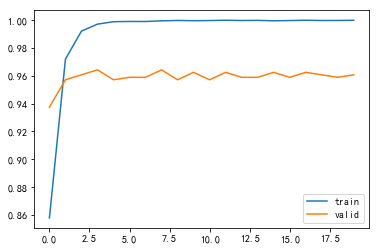

In [7]:
%matplotlib inline
import matplotlib.pylab as plt
plt.plot(train_acc,label="train")
plt.plot(valid_acc,label='valid')
plt.legend()
plt.plot()

In [8]:
torch.save(model_ft.state_dict(), './model.pth')
print("done")

done


In [ ]:
import moxing as mox
mox.file.copy('./model.pth','s3://obs-aifood-huqi88/model_output/model/resnet-50.pth')
print("done")